df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,2,2,15,9,12,10,17,...,6,6,4,0,0,0,0,0,0,0
2,1,2024-01-18 13:18:00,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,2024-01-18 13:19:00,1,0,0,0,0,1,0,2,...,3,0,20,0,0,0,0,0,0,0
4,1,2024-01-18 13:20:00,1,0,0,0,4,3,0,1,...,0,0,9,0,0,0,0,0,0,0
5,1,2024-01-18 13:21:00,1,0,0,0,3,3,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

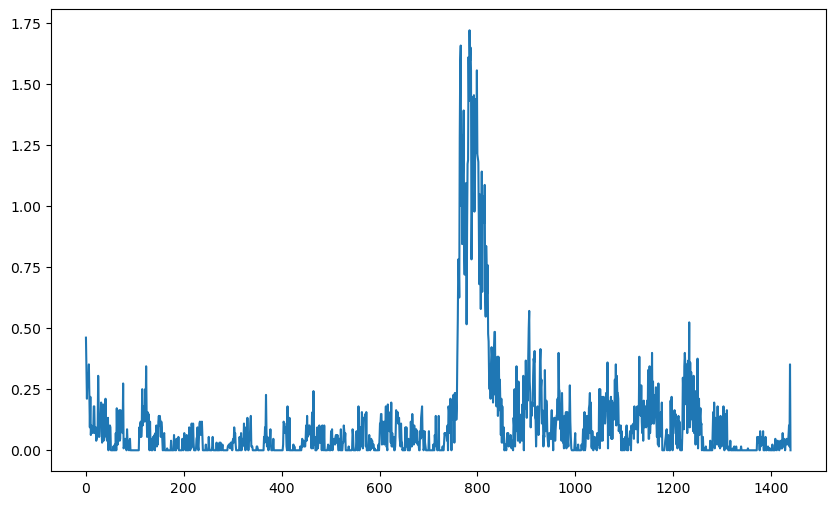

In [26]:
############# DATA FRAMES
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import pandas as pd

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['StA LD-DD 0118-0201-2024-Copy1.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")

############# ZT TIME

def find_zeros_followed_by_ones(column):
    zero_followed_by_one = (column == 0) & (column.shift(-1) == 1)
    return zero_followed_by_one

df3 = dataframes["df1"]

light_column = df3['Light']

O_followedby_l = find_zeros_followed_by_ones(light_column)

test = df3['Light'][O_followedby_l]

#print(test) #output is 822, 2262, 3072, 5142, 6582, 8022

df3 = dataframes["df1"]
display(df3)

dfx = df3.iloc[823:2263]
dfy = df3.iloc[2262:3703]
dfz = df3.iloc[3703:5143]
dfa = df3.iloc[5142:6583] 

# new_indexes = np.arange(0, 1500, 1)

dfx = dfx.reset_index(drop=True)
dfy = dfy.reset_index(drop=True)
dfz = dfz.reset_index(drop=True)
dfa = dfa.reset_index(drop=True)

df_out = pd.concat([dfx, dfy, dfz, dfa], axis = 1)

filering_spiders = df_out.filter(like="Sp")
meanmov_spiders = filering_spiders.mean(axis=1) 

meanmov_spiders.plot(figsize=(10, 6))

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
644,2,2024-01-19 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,2,2024-01-19 00:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
646,2,2024-01-19 00:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,2,2024-01-19 00:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,2,2024-01-19 00:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,6,2024-01-23 23:55:00,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7840,6,2024-01-23 23:56:00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7841,6,2024-01-23 23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


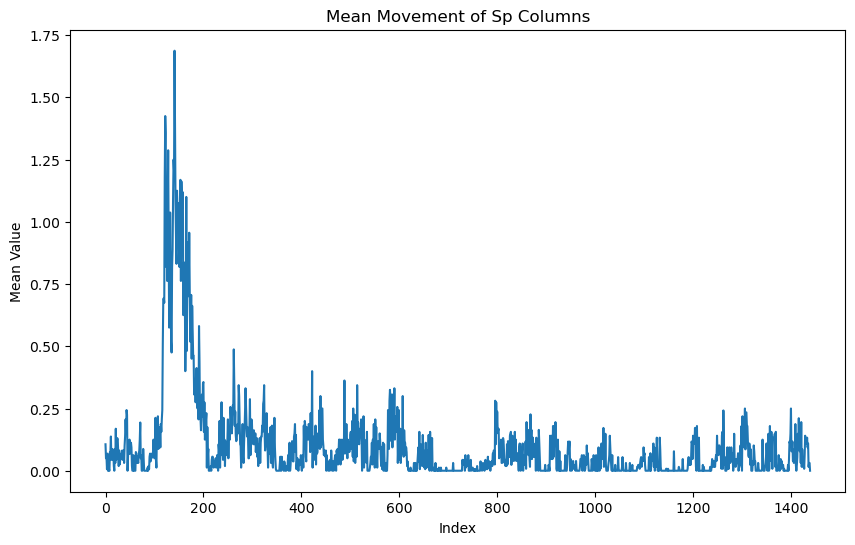

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df3 = df3.drop(df3[(df3['Day'] < 2) | (df3['Day'] > 6)].index)
display(df3)

def find_zeros_followed_by_ones(column):
    zero_followed_by_one = (column == 0) & (column.shift(-1) == 1)
    return zero_followed_by_one

def process_dataframe(df, column_name, spider_prefix="Sp"):
    zero_one_indices = find_zeros_followed_by_ones(df[column_name])
    split_indices = df.index[zero_one_indices].tolist()
    
    chunks = []
    start = 0
    for end in split_indices:
        chunk = df.iloc[start:end+1].reset_index(drop=True)
        chunks.append(chunk)
        start = end + 1
    
    max_length = max(len(chunk) for chunk in chunks)
    padded_chunks = [chunk.reindex(range(max_length)) for chunk in chunks]
    
    df_out = pd.concat(padded_chunks, axis=1)
    spider_columns = df_out.filter(like=spider_prefix)
    meanmov_spiders = spider_columns.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    meanmov_spiders.plot()
    plt.title(f"Mean Movement of {spider_prefix} Columns")
    plt.xlabel("Index")
    plt.ylabel("Mean Value")
    plt.show()
    
    return df_out, meanmov_spiders
    
df_out, meanmov_spiders = process_dataframe(df3, 'Light')

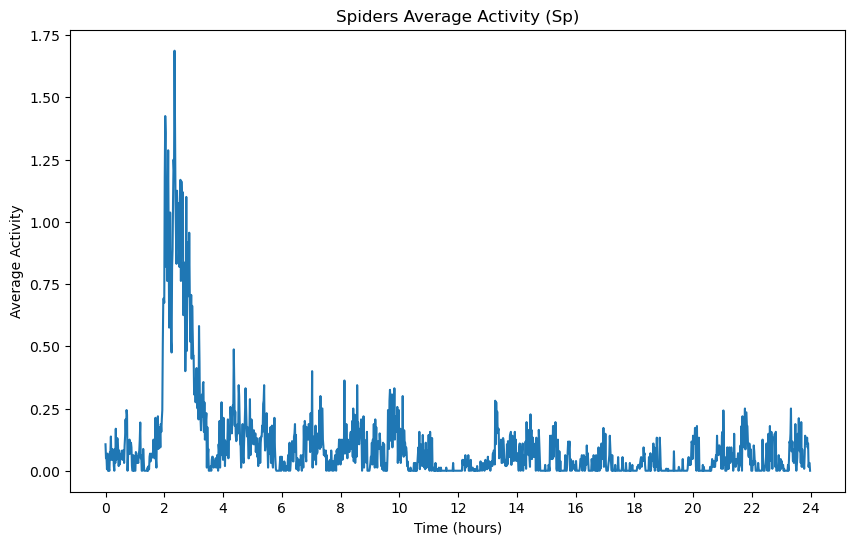

In [30]:
######### ALL SPIDERS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def find_zeros_followed_by_ones(column):
    zero_followed_by_one = (column == 0) & (column.shift(-1) == 1)
    return zero_followed_by_one

def minutes_to_hours(minutes):
    return minutes / 60

def process_dataframe(df, column_name, spider_prefix="Sp"):
    zero_one_indices = find_zeros_followed_by_ones(df[column_name])
    
    split_indices = df.index[zero_one_indices].tolist()
    
    chunks = []
    start = 0
    for end in split_indices:
        chunk = df.iloc[start:end+1].reset_index(drop=True)
        chunks.append(chunk)
        start = end + 1
    
    max_length = max(len(chunk) for chunk in chunks)
    padded_chunks = [chunk.reindex(range(max_length)) for chunk in chunks]
    
    df_out = pd.concat(padded_chunks, axis=1)
    
    spider_columns = df_out.filter(like=spider_prefix)
    
    meanmov_spiders = spider_columns.mean(axis=1)
    
    x_axis_hours = [minutes_to_hours(x) for x in meanmov_spiders.index]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis_hours, meanmov_spiders)
    plt.title(f"Spiders Average Activity ({spider_prefix})")
    plt.xlabel("Time (hours)")
    plt.ylabel("Average Activity")
    # plt.xlim(0, 24) 
    plt.xticks(range(0, 25, 2))  
    plt.show()
    
    return df_out, meanmov_spiders

df_out, meanmov_spiders = process_dataframe(df3, 'Light')

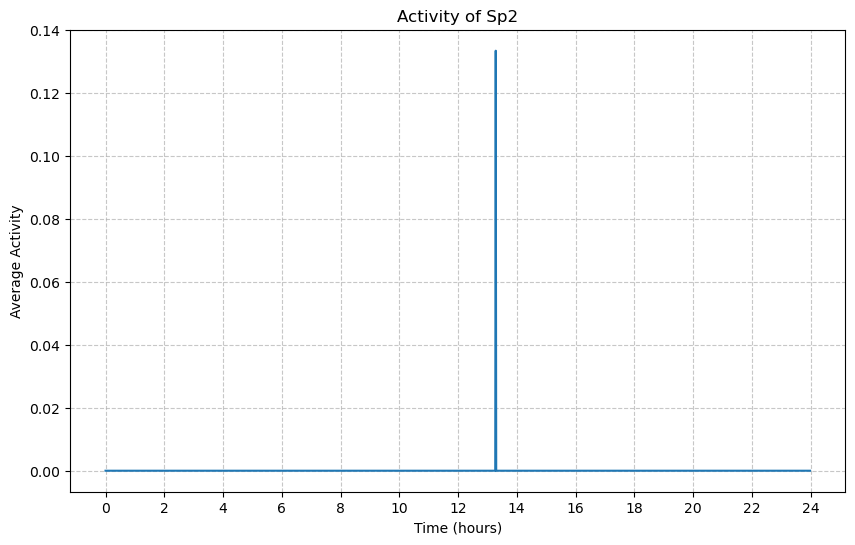

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def minutes_to_hours(minutes):
    return minutes / 60

def process_dataframe(df, spider_prefix="Sp", single_spider=None):
    # Convert Time to datetime if it's not already
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Extract minutes from midnight
    df['Minutes'] = df['Time'].dt.hour * 60 + df['Time'].dt.minute
    
    # Group by minutes and calculate mean for spider columns
    spider_columns = [col for col in df.columns if col.startswith(spider_prefix)]
    grouped_df = df.groupby('Minutes')[spider_columns].mean()
    
    if single_spider:
        if single_spider in spider_columns:
            spider_data = grouped_df[single_spider]
            title = f"Activity of {single_spider}"
        else:
            print(f"Spider {single_spider} not found. Plotting mean of all spiders.")
            spider_data = grouped_df.mean(axis=1)
            title = f"Spiders Average Activity ({spider_prefix})"
    else:
        spider_data = grouped_df.mean(axis=1)
        title = f"Spiders Average Activity ({spider_prefix})"
    
    x_axis_hours = [minutes_to_hours(x) for x in spider_data.index]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis_hours, spider_data)
    plt.title(title)
    plt.xlabel("Time (hours)")
    plt.ylabel("Average Activity")
    plt.xticks(range(0, 25, 2))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return grouped_df, spider_data

# For a single spider (e.g., Sp1)
grouped_df, sp1_data = process_dataframe(df, single_spider='Sp2')